In [1]:
import commons


# this is a list of features which are used in the Project Activity Score
features = [
    'Number of contributors last three months',
    'Number of commits last three months'
]

class TestVector(commons.BaseTestVector):
        
    def __init__(self, alias = ''):
        super().__init__(features, alias)
            
    def number_of_contributors(self, n):
        return self.set('Number of contributors last three months', n)
    
    def number_of_commits(self, n):
        return self.set('Number of commits last three months', n)


test_vector_list = commons.TestVectorList(features)

In [2]:
all_unknown_values = TestVector().score_from(0.0).score_to(0.1)
test_vector_list.register(all_unknown_values)

test_vector_list.register(
    TestVector()
        .number_of_contributors(0)
        .number_of_commits(0)
        .score_from(0.0)
        .score_to(0.5)
)

# TODO: should it be less than 1.0?
test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(5)
        .score_from(0.0)
        .score_to(3.0)
)

# TODO: should it be less than 4.0?
test_vector_list.register(
    TestVector()
        .number_of_contributors(3)
        .number_of_commits(50)
        .score_from(2.0)
        .score_to(5.5)
)

# TODO: should it be less than 2.0?
test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(20)
        .score_from(0.0)
        .score_to(3.5)
)

# it's not too good if a single person maintains a project
# TODO: should the score be less than 5.0?
test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(200)
        .score_from(3.0)
        .score_to(9.0)
)

# TODO: should the score be less than 6.0?
test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(500)
        .score_from(4.0)
        .score_to(9.0)
)

# it's good if there are many contributors even if there are not too many commits
test_vector_list.register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(50)
        .score_from(5.0)
        .score_to(7.0)
)

# if there are many contributors and commits, the score should be close to max
test_vector_list.register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(200)
        .score_from(7.0)
        .score_to(10.0)
)
test_vector_list.register(
    TestVector()
        .number_of_contributors(30)
        .number_of_commits(400)
        .score_from(8.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4
registered: test_vector_5
registered: test_vector_6
registered: test_vector_7
registered: test_vector_8
registered: test_vector_9


In [3]:
test_vector_list.check()

In [4]:
# define test vectors
test_vectors = test_vector_list.make_data_frame()

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/ProjectActivityScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

,alias,score_from,score_to,label,Number of contributors last three months,Number of commits last three months
0,test_vector_0,0.0,0.1,None,unknown,unknown
1,test_vector_1,0.0,0.5,None,0,0
2,test_vector_2,0.0,3.0,None,1,5
3,test_vector_3,2.0,5.5,None,3,50
4,test_vector_4,0.0,3.5,None,1,20
5,test_vector_5,3.0,9.0,None,1,200
6,test_vector_6,4.0,9.0,None,1,500
7,test_vector_7,5.0,7.0,None,20,50
8,test_vector_8,7.0,10.0,None,20,200
9,test_vector_9,8.0,10.0,None,30,400


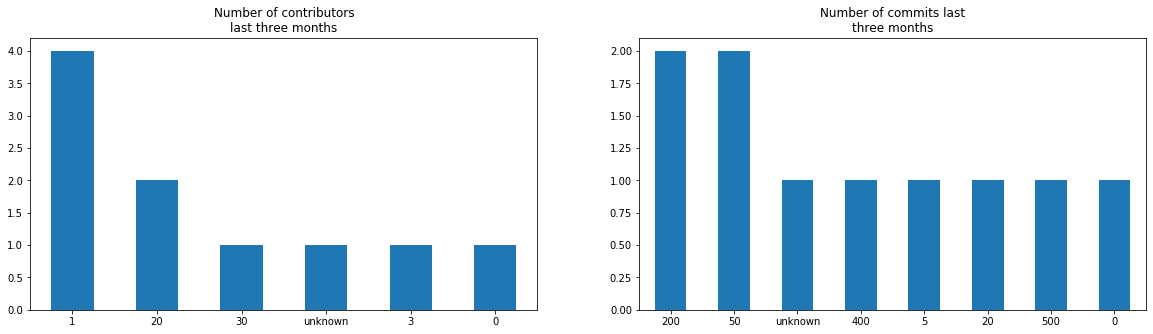

In [6]:
commons.draw_hists(features, test_vectors)